# Numerically Computing the Electric Field

## Reminders from previous Homeworks

One type of problem you will encounter in electrostatics is one where you know the distribution of charge at every point in space (or every point where the sources exist) and you need to determine the electric field everywhere in space (or everywhere you are interested). This can be done using Coulomb's law,

$$ \vec{E} = \int_V \dfrac{1}{4\pi\varepsilon_0}\dfrac{dq}{|\mathfrak{\vec{r}}|^2}\hat{\mathfrak{r}}$$

This calculation might be difficult to perform for all locations that you are interested in, or it might be downright impossible to solve analytical as no anti-derivative might exist for the function. In this case, using numerical techniques makes the problem tractable.

## The concept of numerical integration 

Typically, when you perform an integral analytically, you are seeking the anti-derivative of the function that you are integrating. This is one productive way to think about an integral. 

Another productive way to think about integration is adding up small bits. You might think about this when you do a line integral, but this can also be a productive way of thinking about any kind of integral, in particular, numerical integration. To conceptualize a numerical integral where you are trying to determine the electric field it is important to follow these steps:

1. Divide the source into chunks ($dq$) and pick a starting chunk
2. Determine the separation vector (Griffiths script-r, $\vec{\mathfrak{r}}$) between the chunk and the observation location
3. Compute the contribution to the total electric field from the chunk ($d\vec{E}$) - treating it as a point charge of size $dq$
4. Add this contribution to the "running" total of electric field
5. Repeat steps 2-5, which form the basis of numerical integration (it's the superposition of the chunks), until you have added up the contributions of all the chunks

## Purpose of this problem


In this problem, you will calculate and display the electric field of a line charge.

_For this problem, we will limit our calculations to two-dimensions as we are going to be graphing in a plane._

### Import the relevant libraries

We will begin by importing numpy and matplotlib, which allow us to do vector calculations and plotting. The "magic" at the end of these library imports ensures that the graphs will show up in the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Computing the Electric Field of a line of charge

You might want to remind yourself how we can use array calculations with numpy. 

Consider a uniformly charged rod with total charge of 0.1 $\mu C$. It lies along the $x$-axis from -0.1 to 0.1 meters. We want to compute and represent the electric field of the charge at a distance of $0.01 m$ from the charge along the $y$-axis.

_Note: that we are still working in 2D as we will also graph this._

Below, we construct the line charge from an array of points (20 chunks of the line charge). We plot it as well.

In [3]:
## Length of rod (m)
L = 0.2

## Location of the ends of the rod (m)
lineStartX = -L/2
lineEndX = +L/2

## Number of chunks that the rod is cut up into
Nchunks = 20

## Create locations for the chunks that are equally spaces
xLocations = np.linspace(lineStartX+L/2/Nchunks,lineEndX-L/2/Nchunks,Nchunks)
print(xLocations)
yLocations = np.zeros(Nchunks)

## Stack the locations so that they are regular (x,y) ordered pairs
chunkLocations = np.stack((xLocations,yLocations), axis=1)

[-0.095 -0.085 -0.075 -0.065 -0.055 -0.045 -0.035 -0.025 -0.015 -0.005
  0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085  0.095]


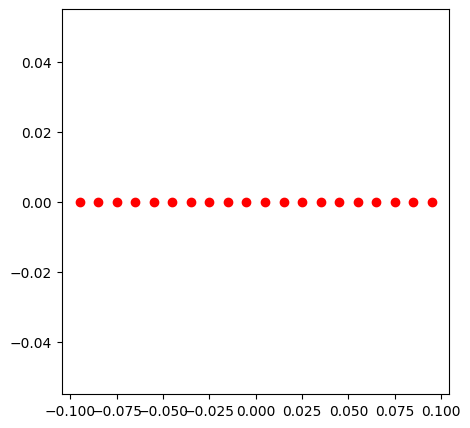

In [4]:
fig = plt.figure(figsize=(5,5))

## This for loop lets you do an operation on each chunk
for thisLocation in chunkLocations:
    
    plt.plot(thisLocation[0],thisLocation[1],'ro')

In [5]:
k = 9e9                           ## Electric constant in SI
Q = 0.1e-6                        ## Charge in C

chargeOfChunk = Q/Nchunks         ## Charge of a single chunk

### Problems to solve

Using numerical superposition, adding up the contributions to the electric field due to each chunk, you will solve the following problems.

1. We want to compute and represent the electric field of the charge at a distance of $0.01 m$ from the line charge along the $y$-axis. Do this.
2. The analytical formula for the electric field of the rod at that location is: $E_{rod} = \dfrac{1}{4\pi\varepsilon_0}\dfrac{Q}{y\sqrt{L^2/4+y^2}}$. Compare the value of the electric field at that location for different values of 'Nchunks', say for 10, 20, 50, and 100 chunks. How close do you get with 100 chunks? How many chunks do you need to get within 1% of the analytical solution?
3. Using what you have built to find the electric field at this location, find the electric field at a variety of points around the the line charge and represent them with arrows. You can choose the locations, but be systematic.

In [22]:
import numpy as np

# Length of rod (m)
L = 0.2

# Location of the ends of the rod (m)
lineStartX = -L/2
lineEndX = +L/2

# Number of chunks that the rod is cut up into
Nchunks = 20

# Create locations for the chunks that are equally spaced
xLocations = np.linspace(lineStartX + L/(2*Nchunks), lineEndX - L/(2*Nchunks), Nchunks)
yLocations = np.zeros(Nchunks)

# Stack the locations so that they are regular (x, y) ordered pairs
chunkLocations = np.stack((xLocations, yLocations), axis=1)
#print(chunkLocations)
# Electric constant in SI (vacuum permittivity)
k = 9e9

# Total charge on the rod (Coulombs)
Q = 0.1e-6

# Charge of a single chunk
chargeOfChunk = Q / Nchunks

# Point where electric field is calculated (you can change this)
P = np.array([0.0, 0.1])  # Point (x, y)

# Initialize variables to store the electric field
E_total = np.zeros(2)

# Calculate the electric field due to each chunk and sum them up
for chunkLocation in chunkLocations:
    r = P - chunkLocation  # Vector from the chunk to the point P
    #print('r=',r)
    r_magnitude = np.linalg.norm(r)
    #print('magr=',r_magnitude)
    dE = (k * chargeOfChunk / r_magnitude**3) * r  # Electric field due to this chunk
    #print('de=', dE)
    E_total += dE

# Print the total electric field at point P
print("Electric Field at Point P:", E_total) #wait shouldn't this be entirely vertical?


r= [0.095 0.1  ]
magr= 0.1379311422413372
de= [1629.10516616 1714.84754332]
r= [0.085 0.1  ]
magr= 0.1312440474840669
de= [1691.96974771 1990.55264436]
r= [0.075 0.1  ]
magr= 0.125
de= [1728. 2304.]
r= [0.065 0.1  ]
magr= 0.11926860441876563
de= [1724.0404764  2652.36996369]
r= [0.055 0.1  ]
magr= 0.11412712210513329
de= [1664.97840612 3027.23346568]
r= [0.045 0.1  ]
magr= 0.10965856099730655
de= [1535.66823117 3412.59606926]
r= [0.035 0.1  ]
magr= 0.10594810050208546
de= [1324.34468711 3783.84196316]
r= [0.025 0.1  ]
magr= 0.10307764064044153
de= [1027.20970604 4108.83882414]
r= [0.015 0.1  ]
magr= 0.10111874208078343
de= [ 652.84306913 4352.28712754]
r= [0.005 0.1  ]
magr= 0.10012492197250394
de= [ 224.15887905 4483.177581  ]
r= [-0.005  0.1  ]
magr= 0.10012492197250394
de= [-224.15887905 4483.177581  ]
r= [-0.015  0.1  ]
magr= 0.10111874208078343
de= [-652.84306913 4352.28712754]
r= [-0.025  0.1  ]
magr= 0.10307764064044153
de= [-1027.20970604  4108.83882414]
r= [-0.035  0.1  ]
magr

In [24]:
E_analytical = k* Q / (((L ** 2) / 4 + P[1] ** 2) ** 1/2)
print(E_analytical)
print(np.linalg.norm(E_total))



89999.99999999999
63659.49036432365


For #2 lets just throw it all in a giant for loop for ease

In [30]:

values = [10,20,50,100]

import numpy as np
# Length of rod (m)
L = 0.2
# Location of the ends of the rod (m)
lineStartX = -L/2
lineEndX = +L/2
# Number of chunks that the rod is cut up into
# Electric constant in SI (vacuum permittivity)
k = 9e9
# Total charge on the rod (Coulombs)
Q = 0.1e-6

for i in values:
    Nchunks = i

    # Create locations for the chunks that are equally spaced
    xLocations = np.linspace(lineStartX + L/(2*Nchunks), lineEndX - L/(2*Nchunks), Nchunks)
    yLocations = np.zeros(Nchunks)

    # Stack the locations so that they are regular (x, y) ordered pairs
    chunkLocations = np.stack((xLocations, yLocations), axis=1)
    #print(chunkLocations)

    # Charge of a single chunk
    chargeOfChunk = Q / Nchunks

    # Point where electric field is calculated (you can change this)
    P = np.array([0.0, 0.1])  # Point (x, y)

    # Initialize variables to store the electric field
    E_total = np.zeros(2)

    # Calculate the electric field due to each chunk and sum them up
    for chunkLocation in chunkLocations:
        r = P - chunkLocation  # Vector from the chunk to the point P
        #print('r=',r)
        r_magnitude = np.linalg.norm(r)
        #print('magr=',r_magnitude)
        dE = (k * chargeOfChunk / r_magnitude**3) * r  # Electric field due to this chunk
        #print('de=', dE)
        E_total += dE

    # Print the total electric field at point P
    print("Electric Field at Point P:", E_total, i, 'chuncks') #wait shouldn't this be entirely vertical?
    print((E_analytical-np.linalg.norm(E_total))/E_analytical)


Electric Field at Point P: [-1.36424205e-12  6.37190394e+04] 10 chuncks
0.292010673790668
Electric Field at Point P: [1.13686838e-12 6.36594904e+04] 20 chuncks
0.2926723292852927
Electric Field at Point P: [1.02318154e-12 6.36427921e+04] 50 chuncks
0.29285786553998383
Electric Field at Point P: [1.47792889e-12 6.36404058e+04] 100 chuncks
0.2928843801076375


I have no clue what it takes to get it to work properly.Here's graphing

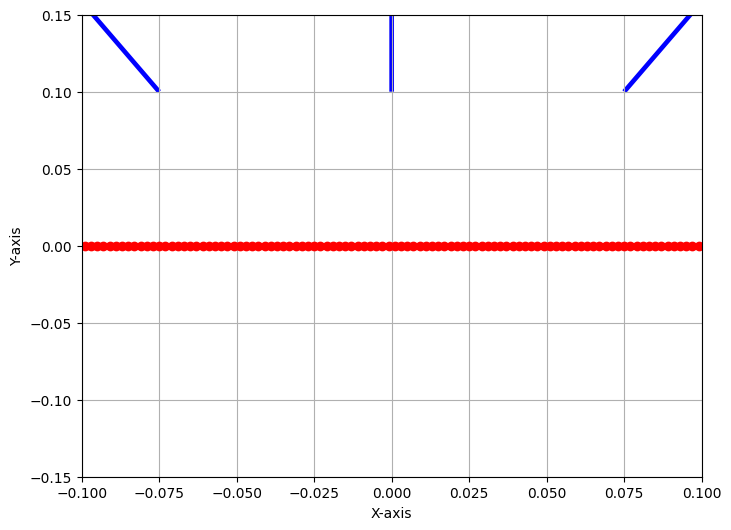

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Length of rod (m)
L = 0.2

# Location of the ends of the rod (m)
lineStartX = -L/2
lineEndX = +L/2

# Electric constant in SI (vacuum permittivity)
k = 9e9

# Total charge on the rod (Coulombs)
Q = 0.1e-6

# Define the points where electric field is calculated (y-values)
x_values = np.linspace(-0.15, 0.15, 5)  # Adjust the range as needed

# Create a figure and axis for the electric field vector plot
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the analytical electric field using the provided formula
def analytical_field(Q, y, L):
    return k * (Q / (y * np.sqrt(L**2/4 + y**2)))

# Initialize variables to store the electric field vectors at each point
E_vectors = []

for x_value in x_values:
    # Define the point where electric field is calculated (x is fixed at 0)
    P = np.array([x_value, 0.1])
    
    # Initialize variables to store the electric field at this point
    E_total = np.zeros(2)

    # Calculate the electric field due to each chunk and sum them up
    for chunkLocation in chunkLocations:
        r = P - chunkLocation  # Vector from the chunk to the point P
        r_magnitude = np.linalg.norm(r)
        dE = (k * chargeOfChunk / r_magnitude**3) * r  # Electric field due to this chunk
        E_total += dE

    # Calculate the analytical electric field at this point
    E_analytical = analytical_field(Q, P[1], L)
    
    # Store the electric field vectors
    E_vectors.append(E_total)

    # Plot the electric field vector at this point
    plt.quiver(P[0], P[1], E_total[0], E_total[1], angles='xy', scale_units='xy', scale=1, color='b')

fig = plt.plot

## This for loop lets you do an operation on each chunk
for thisLocation in chunkLocations:
    
    plt.plot(thisLocation[0],thisLocation[1],'ro')

# Set axis limits and labels
plt.xlim(-0.1, 0.1)
plt.ylim(-0.15, 0.15)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.grid()
plt.show()


good enough